## Model Comparison & Selection
  ### This script compares different models for Named Entity Recognition (NER) on Amharic text data from @sinayelj, @qnashcom and @leyueqa Telegram channels.

- Finetune multiple models
- Evaluate the fine-tuned models on the validation set
- Compare models based on accuracy, speed, and robustness
- Select the best-performing model for production



  


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
scripts_path = '/content/scripts'

In [4]:
# Add the correct scripts folder path
import sys
sys.path.append('/content/scripts')

In [1]:
! pip install datasets
! pip install seqeval==0.0.10

In [5]:
# import all functions from our script
from model_comparison import *

In [6]:
#  Load and prepare the data
file_path = '/content/qenashcom_sinayelj_leyueqa_labeled.conll'

In [7]:
#Load and prepare the data
sentences, labels = load_conll_data(file_path)
dataset = prepare_dataset(sentences, labels)

Skipping line due to ValueError: ጥራት 
Skipping line due to ValueError: ግራንድI-LOC
Skipping line due to ValueError: ️


In [8]:
selected_columns = dataset.select_columns(['tokens', 'ner_tags'])
print(selected_columns)


Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 2405
})


In [9]:
# printing the 'tokens' and 'ner_tags' columns
tokens = dataset['tokens']
ner_tags = dataset['ner_tags']

# Print the first 5 entries as an example
for i in range(5):
    print(f"Tokens: {tokens[i]}")
    print(f"NER Tags: {ner_tags[i]}")


Tokens: ['ይህን', 'መፍጫ', 'ከሁሉም', 'የተሻለ', 'ሆኖ', 'አግኝተነዋል', '1', 'አስተማማኝ', 'የሆነ', 'ዕቃ', 'በኤሌክትሪክ', 'የሚሰራ', 'የሽንኩርት', 'የስጋ', 'የጨጓራ', 'መፍጫ', 'በ', '15', 'ሰከንዶች', 'ዉስጥ', 'ድቅቅ', 'አድርጎ', 'የሚፈጭ', 'ምላጭ', 'በ', '3', 'ሊትር', 'እና', '5ሊትር', 'ፈጣን', 'የሆኑ', '3ሊትር', '2100', '5ሊትር', '2600', 'የ1', 'አመት', 'ዋስትና', 'ያላቸዉ', 'በጣም', 'የሚያስደስት', 'ዕቃ', 'ደዉለዉ', 'ማዘዝ', 'ይችላሉ', 'ይህን', 'ዕቃ', 'እና', 'ሌላ', '1', 'እቃ', 'ጨምረዉ', 'ሲገዙ', '1', 'ምርጥ', 'ቢላ', 'በነፃ', 'አድራሻ', 'ቁጥር', '1', 'ልደታ', 'ወደ', 'ባልቻ', 'ሆስታል', 'ገባ', 'ብሎ', 'አህመድ', 'ህንፃ', 'ላይ', '1ኛፎቅ', '105', 'ቁጥር', '2', '22', 'አውራሪስ', 'ሆቴል', 'አጠገብ', 'በፀጋ', 'ህንፃ', '3ኛ', 'ፎ', 'ቅ', 'ከ', 'ሊፍቱ', 'በ', 'ግራ', 'የሱቅ', 'ቁጥር', '10', 'ይደዉሉልን', 'ባሉበት', 'ያለተጨማሪ', 'ክፍያ', 'ማዘዝ', 'ይችላሉ', 'ክፍያዎንበሞባይልባንኪንግመፈፀምምይችላሉ', 'በተጨማሪ', 'ከ1000ብር', 'በላይ', 'የሆኑ', 'ሁለትዕቃዎች', 'ሲገዙ', 'ስጦታ', 'እንልክለዎታለን', '/', 'ቻናላችንን', 'ለጓደኛዎ', 'ሸር', 'ማድረግዎን', 'አይርሱ', '0933334444', '0944109295', '0946242424']
NER Tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

In [10]:
# Split into train and evaluation sets
df = pd.DataFrame(dataset)
train_dataset, eval_dataset = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Evaluation dataset size: {len(eval_dataset)}")

Train dataset size: 1924
Evaluation dataset size: 481


In [11]:
# Define Models to Compare
models_to_compare = [
      "xlm-roberta-base",
      "distilbert-base-multilingual-cased",
      "bert-base-multilingual-cased"
    ]

In [12]:
# #  Define label encoding
label_list, label2id, id2label = get_label_encodings()

In [13]:
# Fine-tune and Evaluate Models
print("\n3. Fine-tune and Evaluate Models")
results = []

for model_name in models_to_compare:
  print(f"Training and evaluating {model_name}")
  result = finetune_and_evaluate(model_name, train_dataset, eval_dataset, label_list, label2id, id2label)
  results.append(result)
  print(f"Completed {model_name}\n")


3. Fine-tune and Evaluate Models
Training and evaluating xlm-roberta-base


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1924 [00:00<?, ? examples/s]

Map:   0%|          | 0/481 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.085484
2,No log,0.053835
3,No log,0.042585


Completed xlm-roberta-base

Training and evaluating distilbert-base-multilingual-cased


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1924 [00:00<?, ? examples/s]

Map:   0%|          | 0/481 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.315941
2,No log,0.260547
3,No log,0.224382


Completed distilbert-base-multilingual-cased

Training and evaluating bert-base-multilingual-cased


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1924 [00:00<?, ? examples/s]

Map:   0%|          | 0/481 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.309170
2,No log,0.231774
3,No log,0.208595


Completed bert-base-multilingual-cased



In [14]:
# Compare Results
print("\n4. Compare Results")
for result in results:
   print(f"Model: {result['model_name']}")
   print(f"Eval Loss: {result['eval_loss']}")
   print(f"Training Time: {result['training_time']} seconds")
   print("Classification Report:")
   print(result['classification_report'])
   print("---\n")


4. Compare Results
Model: xlm-roberta-base
Eval Loss: 0.0425846166908741
Training Time: 207.54975628852844 seconds
Classification Report:
           precision    recall  f1-score   support

      LOC       0.97      0.94      0.95       596
    Price       0.95      0.96      0.96       368
  Product       0.66      0.71      0.68       258

micro avg       0.89      0.90      0.89      1222
macro avg       0.90      0.90      0.90      1222

---

Model: distilbert-base-multilingual-cased
Eval Loss: 0.22438202798366547
Training Time: 101.73073315620422 seconds
Classification Report:
           precision    recall  f1-score   support

      LOC       0.51      0.31      0.38      1094
  Product       0.96      0.36      0.53       304
    Price       0.52      0.34      0.41       383

micro avg       0.56      0.32      0.41      1781
macro avg       0.59      0.32      0.41      1781

---

Model: bert-base-multilingual-cased
Eval Loss: 0.20859454572200775
Training Time: 200.769578933


5. Visualize Results
Results visualization saved as 'model_comparison_results.png'


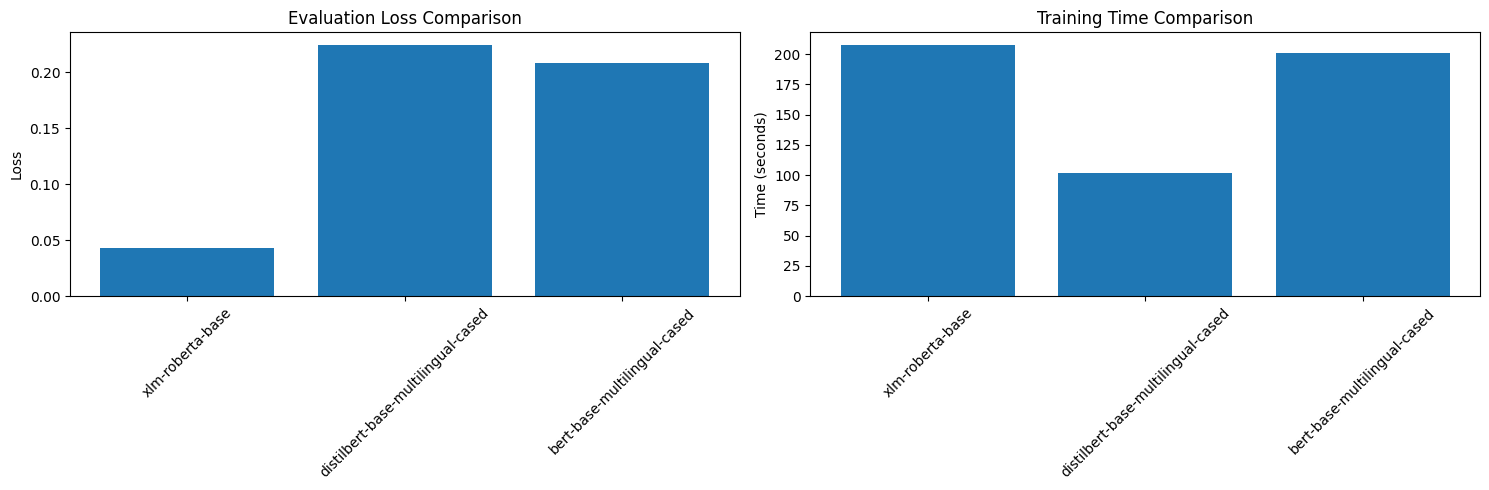

In [15]:
# 5. Visualize Results
print("\n5. Visualize Results")
model_names = [result['model_name'] for result in results]
eval_losses = [result['eval_loss'] for result in results]
training_times = [result['training_time'] for result in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.bar(model_names, eval_losses)
ax1.set_title('Evaluation Loss Comparison')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(model_names, training_times)
ax2.set_title('Training Time Comparison')
ax2.set_ylabel('Time (seconds)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_comparison_results.png')
print("Results visualization saved as 'model_comparison_results.png'")

In [16]:
# Select Best Model
print("\n6. Select Best Model")
best_model = min(results, key=lambda x: x['eval_loss'])
print(f"Best model based on evaluation loss: {best_model['model_name']}")


6. Select Best Model
Best model based on evaluation loss: xlm-roberta-base


In [17]:
# Save best model
best_model['model'].save_pretrained(f"./best_model_{best_model['model_name'].split('/')[-1]}")
best_model['tokenizer'].save_pretrained(f"./best_model_{best_model['model_name'].split('/')[-1]}")
print(f"Best model saved to: ./best_model_{best_model['model_name'].split('/')[-1]}")

Best model saved to: ./best_model_xlm-roberta-base


In [18]:
# 7. Test Best Model on Sample Text
sample_text = "ለኮንዶሚኒየም ለጠባብ ቤቶች ገላግሌ የሆነ ከንፁህ የሲልከን ጥሬ እቃ የተሰራ"
predictions = predict_ner(sample_text, best_model['model'], best_model['tokenizer'], id2label)

In [19]:
print("NER Predictions:")
for token, label in predictions:
  print(f"{token}: {label}")

NER Predictions:
<s>: I-Product
▁ለ: O
ኮ: B-Product
ን: B-Product
ዶ: O
ሚኒ: B-Product
የም: B-Product
▁: B-Product
ለጠ: O
ባብ: O
▁ቤቶች: O
▁: B-Product
ገላ: O
ግ: O
ሌ: O
▁የሆነ: O
▁: B-Product
ከን: O
ፁ: O
ህ: O
▁የ: O
ሲ: O
ል: O
ከን: O
▁ጥ: B-Product
ሬ: O
▁እ: B-Product
ቃ: O
▁የተ: O
ሰራ: O
</s>: I-Product
